In [17]:
#data loading
import pandas as pd
filename="/content/thornton_hiv.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames  villnum  got   distvct     tinc  any   age  hiv2004
0            1      1.0  1.0  2.718921  2.08032  1.0  22.0      0.0
1            2      1.0  NaN  2.835039      NaN  NaN  44.0      NaN
2            3      1.0  1.0  2.485713  1.89120  1.0  19.0      0.0
3            4      1.0  NaN  2.835039      NaN  NaN  30.0      NaN
4            5      1.0  1.0  1.837131  0.09456  1.0  53.0      0.0
...        ...      ...  ...       ...      ...  ...   ...      ...
4815      4816      NaN  NaN  0.000000      NaN  NaN   NaN      NaN
4816      4817      NaN  NaN  0.000000      NaN  NaN   NaN      NaN
4817      4818      NaN  0.0  0.000000  0.37824  1.0  23.0      1.0
4818      4819      NaN  NaN  0.000000      NaN  NaN   NaN      NaN
4819      4820      NaN  NaN  0.000000      NaN  NaN  18.0      NaN

[4820 rows x 8 columns]


In [18]:
##Checking for null values
a.isna().sum()

,0
rownames,0
villnum,27
got,1926
distvct,0
tinc,1919
any,1919
age,441
hiv2004,1926


In [19]:
fillIntColumns={1,2,4,5,6,7}
for x in fillIntColumns:
    a[a.columns[x]]=a[a.columns[x]].fillna(a[a.columns[x]].mean())

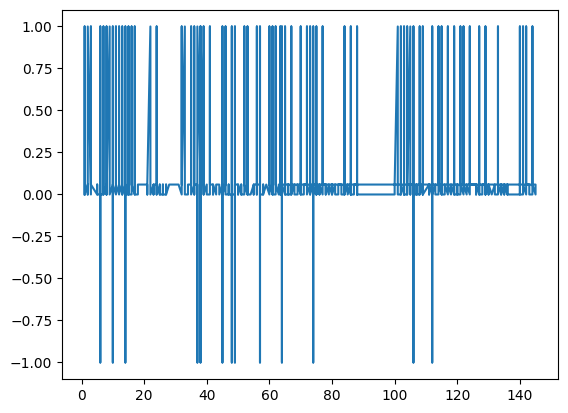

In [20]:
from matplotlib import pyplot as plt
target="hiv2004"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 4820 artists>

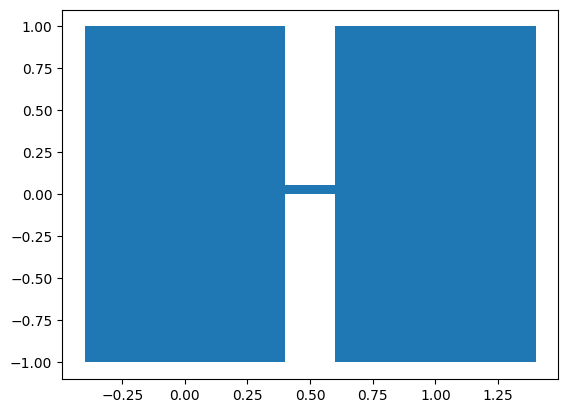

In [21]:
plt.bar(a[a.columns[2]],a[str(target)])

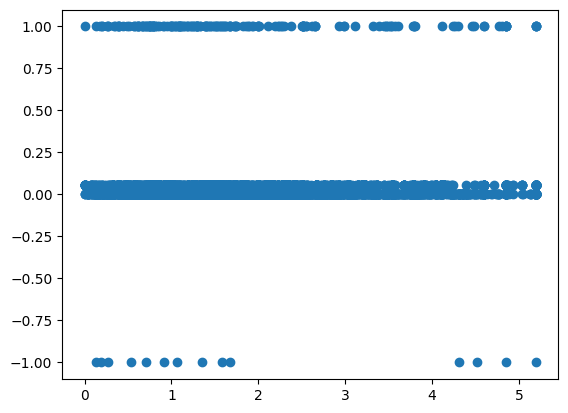

In [22]:
plt.scatter(a[a.columns[3]], a[str(target)])

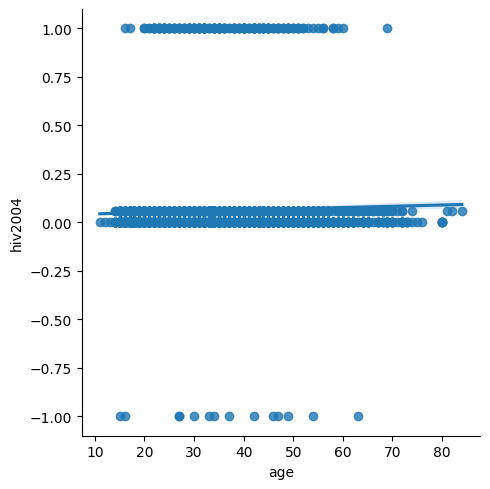

In [23]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='any', ylabel='hiv2004'>

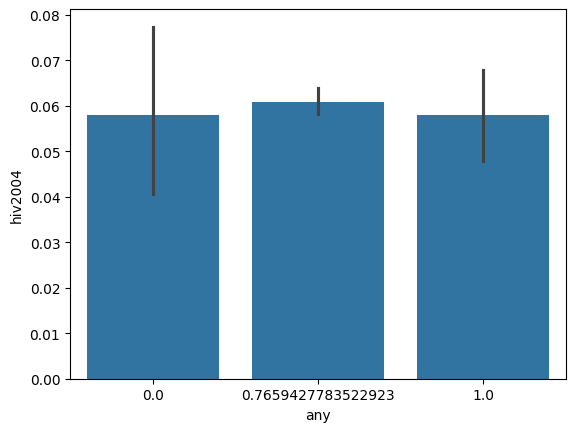

In [24]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='got', ylabel='hiv2004'>

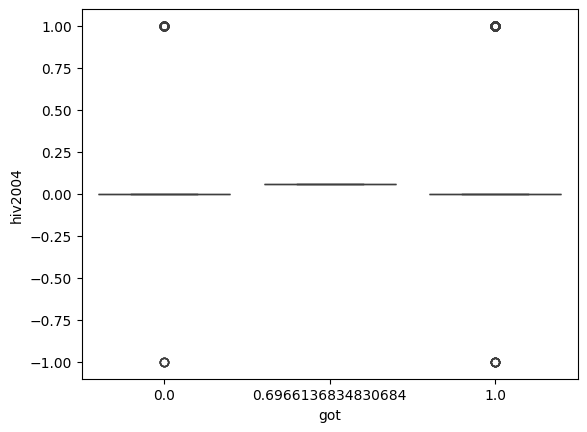

In [25]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-26-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='hiv2004', ylabel='Density'>

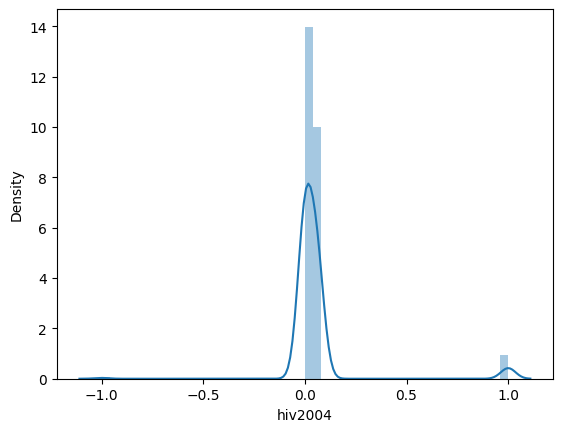

In [26]:
sns.distplot(a[str(target)])

<Axes: xlabel='villnum', ylabel='Density'>

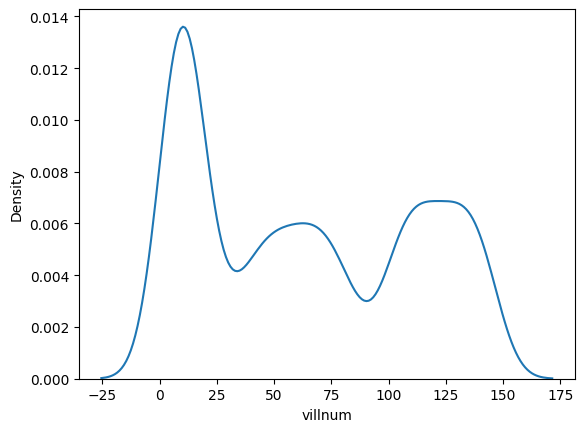

In [27]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='tinc', ylabel='count'>

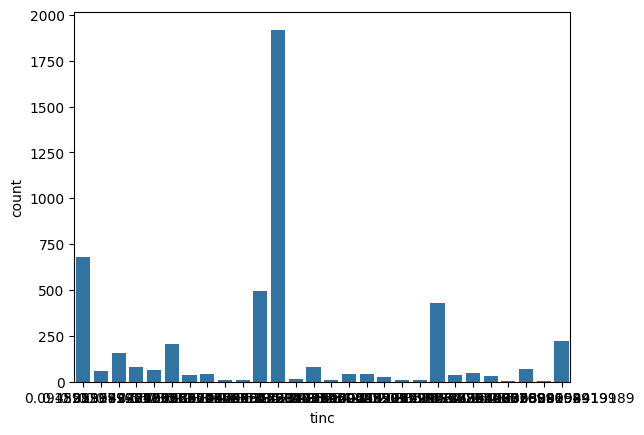

In [28]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

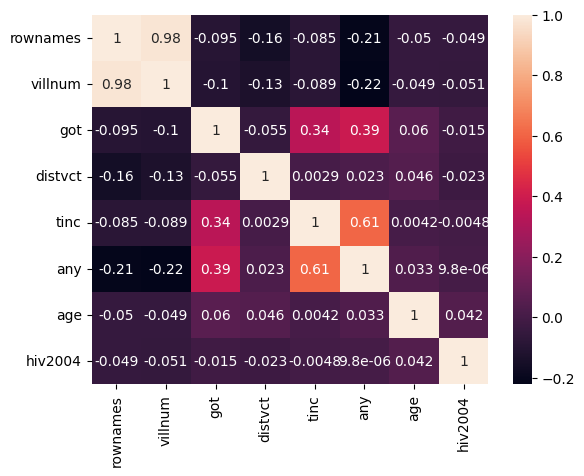

In [29]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

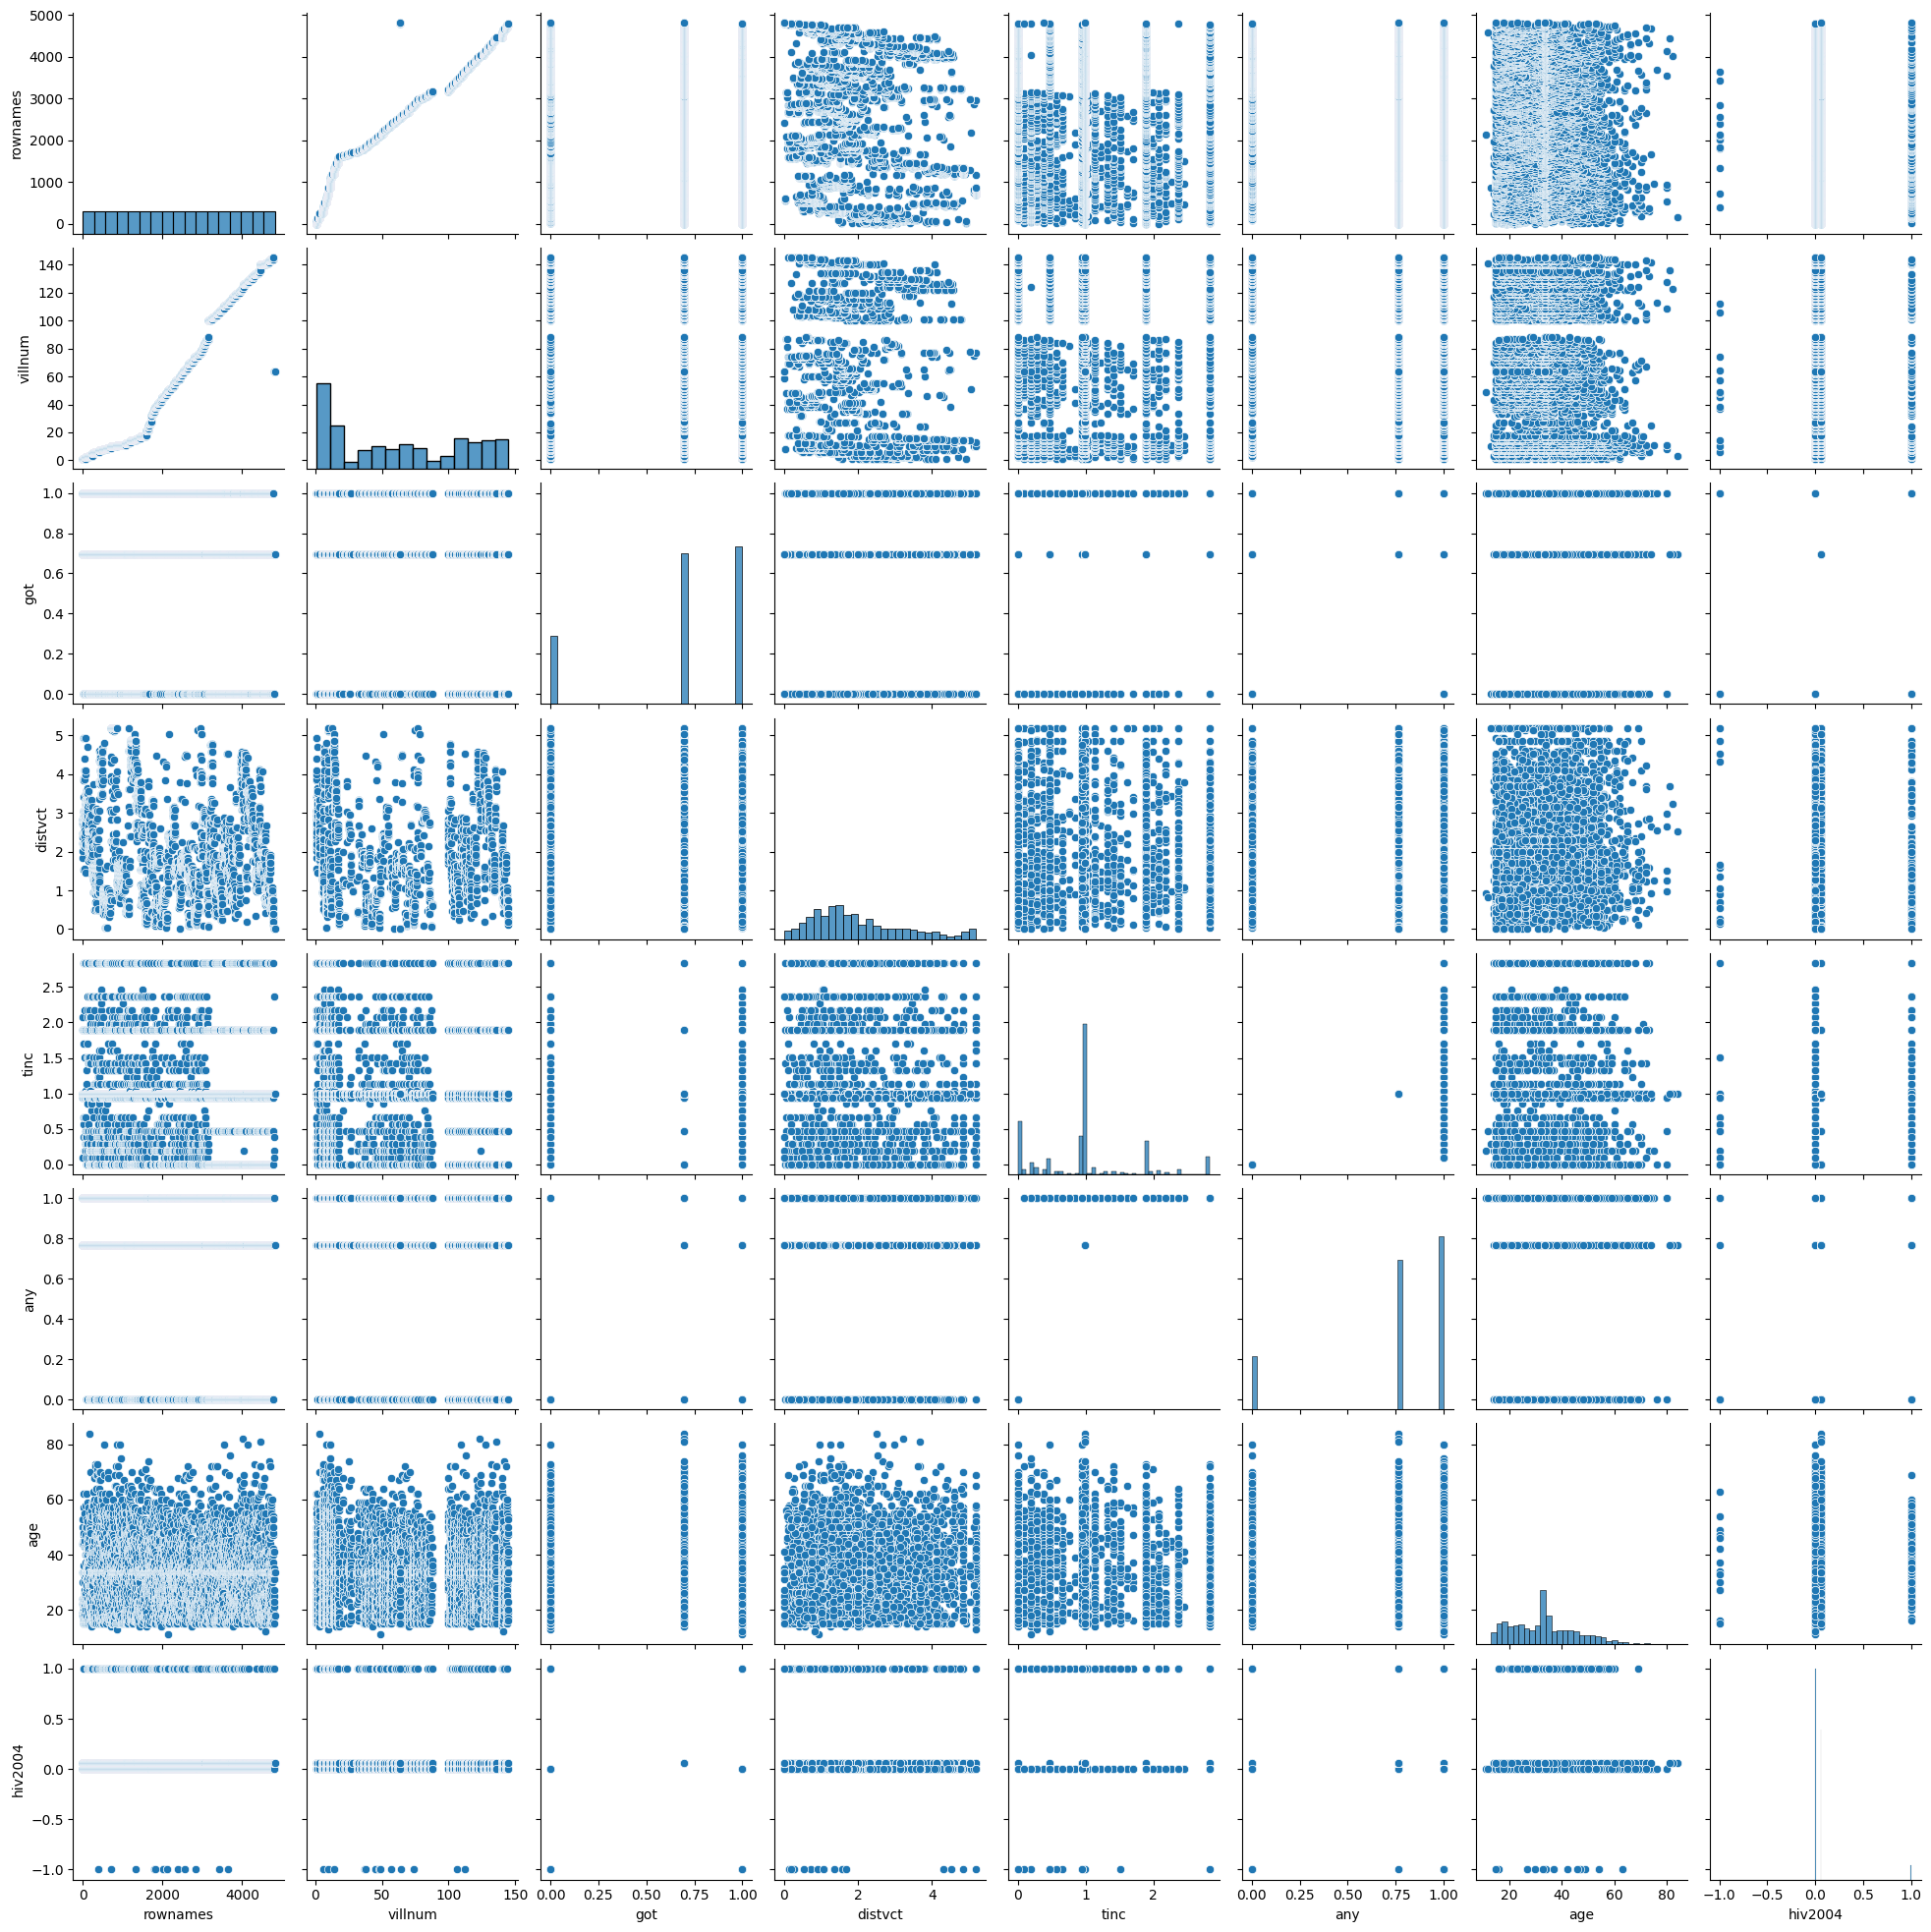

In [30]:
sns.pairplot(data=a)

In [31]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames    villnum       got   distvct     tinc       any        age
0            1   1.000000  1.000000  2.718921  2.08032  1.000000  22.000000
1            2   1.000000  0.696614  2.835039  0.98804  0.765943  44.000000
2            3   1.000000  1.000000  2.485713  1.89120  1.000000  19.000000
3            4   1.000000  0.696614  2.835039  0.98804  0.765943  30.000000
4            5   1.000000  1.000000  1.837131  0.09456  1.000000  53.000000
...        ...        ...       ...       ...      ...       ...        ...
4815      4816  63.477571  0.696614  0.000000  0.98804  0.765943  33.651747
4816      4817  63.477571  0.696614  0.000000  0.98804  0.765943  33.651747
4817      4818  63.477571  0.000000  0.000000  0.37824  1.000000  23.000000
4818      4819  63.477571  0.696614  0.000000  0.98804  0.765943  33.651747
4819      4820  63.477571  0.696614  0.000000  0.98804  0.765943  18.000000

[4820 rows x 7 columns]


In [32]:
print(y)

0       0.000000
1       0.059088
2       0.000000
3       0.059088
4       0.000000
          ...   
4815    0.059088
4816    0.059088
4817    1.000000
4818    0.059088
4819    0.059088
Name: hiv2004, Length: 4820, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
print(x_train)

      rownames  villnum       got   distvct     tinc       any        age
3130      3131     86.0  1.000000  0.916600  0.00000  0.000000  37.000000
306        307      6.0  0.696614  1.580564  0.98804  0.765943  54.000000
3997      3998    122.0  1.000000  4.128119  0.00000  0.000000  35.000000
4748      4749    144.0  1.000000  0.901454  0.00000  0.000000  27.000000
4358      4359    133.0  0.696614  1.330185  0.98804  0.765943  44.000000
...        ...      ...       ...       ...      ...       ...        ...
2441      2442     60.0  0.696614  1.111064  0.98804  0.765943  18.000000
1257      1258     14.0  0.696614  4.181120  0.98804  0.765943  15.000000
1533      1534     17.0  0.696614  2.447807  0.98804  0.765943  20.000000
3788      3789    117.0  0.696614  0.829573  0.98804  0.765943  33.651747
3698      3699    114.0  1.000000  1.061566  0.00000  0.000000  39.000000

[3856 rows x 7 columns]


In [35]:
print(y_train)

3130    0.000000
306     0.059088
3997    0.000000
4748    0.000000
4358    0.059088
          ...   
2441    0.059088
1257    0.059088
1533    0.059088
3788    0.059088
3698    0.000000
Name: hiv2004, Length: 3856, dtype: float64


In [36]:
print(x_test)

      rownames  villnum       got   distvct     tinc       any        age
581        582      8.0  0.696614  0.966362  0.98804  0.765943  36.000000
663        664      9.0  1.000000  0.775983  0.18912  1.000000  36.000000
1728      1729     32.0  1.000000  0.437745  0.18912  1.000000  23.000000
3070      3071     84.0  0.696614  1.621430  0.98804  0.765943  33.651747
2146      2147     49.0  0.696614  1.381127  0.98804  0.765943  24.000000
...        ...      ...       ...       ...      ...       ...        ...
847        848     10.0  0.696614  5.191559  0.98804  0.765943  32.000000
3573      3574    111.0  1.000000  2.017898  0.94560  1.000000  25.000000
4267      4268    132.0  0.696614  2.306510  0.98804  0.765943  33.651747
3154      3155     88.0  0.696614  0.599863  0.98804  0.765943  33.651747
1536      1537     17.0  0.000000  1.878851  0.09456  1.000000  16.000000

[964 rows x 7 columns]


In [37]:
print(y_test)

581     0.059088
663     0.000000
1728    1.000000
3070    0.059088
2146    0.059088
          ...   
847     0.059088
3573    0.000000
4267    0.059088
3154    0.059088
1536    0.000000
Name: hiv2004, Length: 964, dtype: float64


In [39]:
from sklearn.linear_model import LogisticRegression
y_train=y_train.astype('int')

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [42]:
#Print accuracy score
from sklearn.metrics import accuracy_score
y_test=y_test.astype('int')
print(accuracy_score(y_test,ypred))

0.9647302904564315


In [43]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  0   3   0]
 [  0 930   0]
 [  0  31   0]]


In [46]:
print(model.predict([[582,8.0,0.696614,0.966362,0.98804,0.765943,36.000000]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [48]:
print(ypred)

[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0
  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [49]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9336099585062241


In [50]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  0   3   0]
 [  1 895  34]
 [  0  26   5]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.97      0.96      0.97       930
           1       0.13      0.16      0.14        31

    accuracy                           0.93       964
   macro avg       0.37      0.37      0.37       964
weighted avg       0.94      0.93      0.94       964



In [52]:
print(model.predict([[582,8.0,0.696614,0.966362,0.98804,0.765943,36.000000]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [54]:
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [55]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9626556016597511


In [56]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  0   3   0]
 [  0 928   2]
 [  0  31   0]]


In [57]:
print(model.predict([[582,8.0,0.696614,0.966362,0.98804,0.765943,36.000000]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.96      1.00      0.98       930
           1       0.00      0.00      0.00        31

    accuracy                           0.96       964
   macro avg       0.32      0.33      0.33       964
weighted avg       0.93      0.96      0.95       964



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
